In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [26]:
train=pd.read_csv("train-data.csv")
test=pd.read_csv("test-data.csv")

In [27]:
data=pd.concat([train,test])

In [29]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [30]:
data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [31]:
data.shape

(7253, 14)

In [32]:
train.shape

(6019, 14)

In [33]:
test.shape

(1234, 13)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


In [35]:
data.drop("Unnamed: 0",axis=1,inplace=True)

<AxesSubplot:>

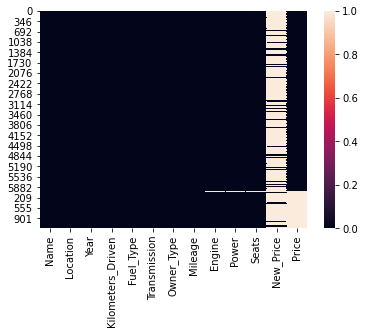

In [36]:
sb.heatmap(pd.isnull(data))

In [37]:
pd.isnull(data).sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [38]:
data["Mileage"].fillna("0",inplace=True)
data["Engine"].fillna("0",inplace=True)
data["Power"].fillna("0",inplace=True)
data["Seats"].fillna(np.mean(data["Seats"]),inplace=True)

In [39]:
data.drop("New_Price",axis=1,inplace=True)

<AxesSubplot:>

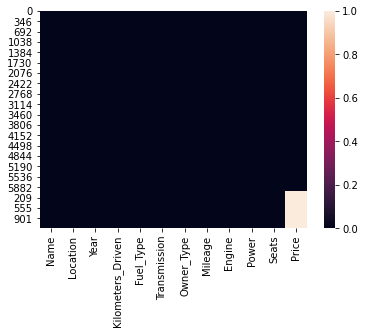

In [40]:
sb.heatmap(pd.isnull(data))

In [41]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [42]:
data.reset_index(inplace=True)

In [43]:
for i in range(len(data)):
    mil_=str(data.loc[i,"Mileage"]).split(" ")
    eng_=str(data.loc[i,"Engine"]).split(" ")
    pow_=str(data.loc[i,"Power"]).split(" ")
    nam_=str(data.loc[i,"Name"]).split(" ")
    
    data.loc[i,"Mileage"]=mil_[0]
    data.loc[i,"Engine"]=eng_[0]
    data.loc[i,"Power"]=pow_[0]
    data.loc[i,"Name"]=nam_[0]

In [44]:
data.tail()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7248,1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
7249,1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
7250,1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
7251,1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN
7252,1233,Mercedes-Benz,Kochi,2014,72443,Diesel,Automatic,First,10.0,2148,170,5.0,NaN


In [46]:
data.head()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [47]:
data.drop("index",axis=1,inplace=True)

In [55]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [57]:
data.replace(to_replace=["null"],value=["0"],inplace=True)

In [58]:
data["Mileage"]=data["Mileage"].astype(float)
data["Engine"]=data["Engine"].astype(float)
data["Power"]=data["Power"].astype(float)

In [60]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [61]:
data["Mileage"].replace(to_replace=[0],value=[np.mean(data["Mileage"])],inplace=True)
data["Engine"].replace(to_replace=[0],value=[np.mean(data["Engine"])],inplace=True)
data["Power"].replace(to_replace=[0],value=[np.mean(data["Power"])],inplace=True)
data["Seats"].replace(to_replace=[0],value=[np.mean(data["Seats"])],inplace=True)

In [62]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [64]:
data.rename(columns={"Name":"Brand"},inplace=True)

In [65]:
data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [66]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7253.000000,7.253000e+03,7253.000000,7253.000000,7253.000000,7253.000000,6019.000000
mean,2013.365366,5.869906e+04,18.344125,1616.508446,112.699567,5.280450,9.479468
std,3.254421,8.442772e+04,4.134108,593.394722,52.845827,0.806308,11.187917
min,1996.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


In [67]:
data.tail()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7248,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN
7249,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN
7250,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN
7251,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN
7252,Mercedes-Benz,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN


<AxesSubplot:>

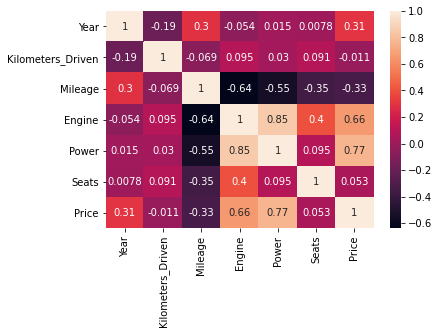

In [69]:
sb.heatmap(data.corr(),annot=True)

In [70]:
data.drop(["Kilometers_Driven","Seats"],axis=1,inplace=True)

In [71]:
data.columns

Index(['Brand', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Price'],
      dtype='object')

In [72]:
data.drop("Location",axis=1,inplace=True)

In [73]:
data.head()

,Brand,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,Maruti,2010,CNG,Manual,First,26.60,998.0,58.16,1.75
1,Hyundai,2015,Diesel,Manual,First,19.67,1582.0,126.20,12.50
2,Honda,2011,Petrol,Manual,First,18.20,1199.0,88.70,4.50
3,Maruti,2012,Diesel,Manual,First,20.77,1248.0,88.76,6.00
4,Audi,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74


In [74]:
data=pd.get_dummies(data,columns=["Brand","Fuel_Type","Transmission","Owner_Type"])

In [130]:
data.head()

,Year,Mileage,Engine,Power,Price,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,998.0,58.16,1.75,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,19.67,1582.0,126.20,12.50,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,18.20,1199.0,88.70,4.50,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,20.77,1248.0,88.76,6.00,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,2013,15.20,1968.0,140.80,17.74,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [131]:
data["used_year"]=2021-data["Year"]

In [132]:
data.drop("Year",axis=1,inplace=True)

In [133]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [78]:
train.shape

(6019, 14)

In [79]:
test.shape

(1234, 13)

In [134]:
X=x[:6019]
Y=y[:6019]

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler=StandardScaler()

In [135]:
X=scaler.fit_transform(X)

In [91]:
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=45)

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
model=RandomForestRegressor()

In [176]:
criterion=["mse","mae"]
max_depth=[int(x) for x in np.arange(2,10,1)]
n_estimators=[int(x) for x in np.arange(10,1000,10)]

In [177]:
param_grids={"criterion":criterion,"max_depth":max_depth,"n_estimators":n_estimators}

In [101]:
from sklearn import metrics

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
rand_model=RandomizedSearchCV(model,param_grids,cv=5)

In [179]:
%%time
rand_model.fit(x_train,y_train)

Wall time: 1h 44min 2s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]})

In [180]:
rand_model.best_params_

{'n_estimators': 800, 'max_depth': 8, 'criterion': 'mae'}

In [181]:
y_predict=rand_model.predict(x_test)

In [182]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

3.371379805971822

c:\users\gauravsah\anaconda3\envs\carpriceprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

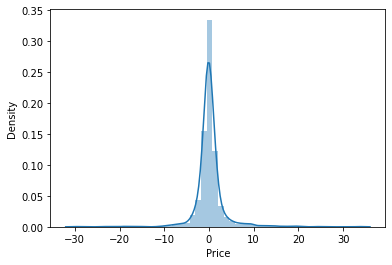

In [183]:
sb.distplot(y_test-y_predict)

c:\users\gauravsah\anaconda3\envs\carpriceprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

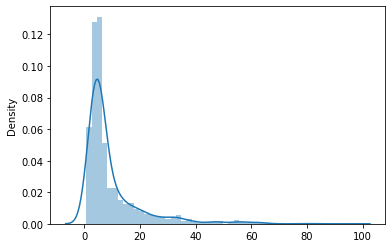

In [184]:
sb.distplot(y_predict)

c:\users\gauravsah\anaconda3\envs\carpriceprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

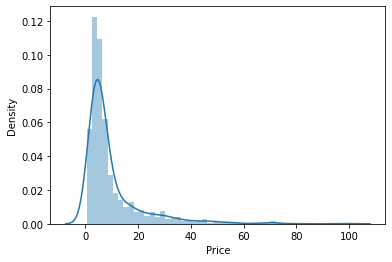

In [185]:
sb.distplot(y_test)

c:\users\gauravsah\anaconda3\envs\carpriceprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

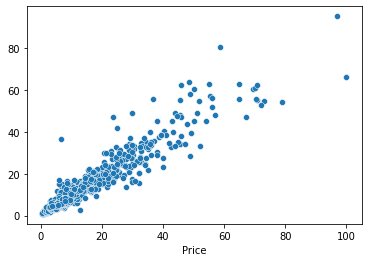

In [186]:
sb.scatterplot(y_test,y_predict)

In [187]:
len(y_predict)

1505

In [188]:
y_test.max()

100.0

In [189]:
y_test.min()

0.45

In [190]:
y_predict.max()

95.20922499999992

In [192]:
y_predict.min()

0.8006562499999987

c:\users\gauravsah\anaconda3\envs\carpriceprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price', ylabel='count'>

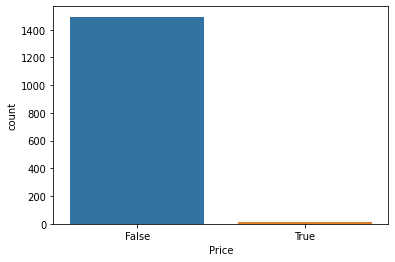

In [198]:
sb.countplot(y_test<0.8)

In [271]:
np.mean(y_test)

9.736166112956811

In [275]:
np.mean(y_predict)

9.551019401993349

In [276]:
x_=x[-1234:]

In [277]:
x_=scaler.fit_transform(x_)

In [278]:
prediction=rand_model.predict(x_)

In [279]:
np.mean(prediction)

9.138381290518636

In [280]:
np.max(prediction)

65.4229125

In [281]:
np.min(prediction)

0.7598312499999986

In [282]:
df=test.copy()

In [283]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [284]:
df.shape

(1234, 13)

In [285]:
df["Predicted"]=pd.Series(prediction)

In [286]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Predicted
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.185806
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,2.660656
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,17.223669
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,5.008175
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,4.275588


c:\users\gauravsah\anaconda3\envs\carpriceprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

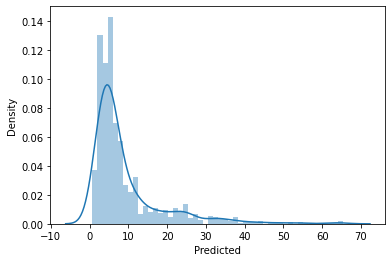

In [298]:
sb.distplot(df["Predicted"])

In [301]:
df.to_csv("output.csv")

In [302]:
import pickle as pk

In [303]:
with open("my_model","wb") as file:
    pk.dump(rand_model,file)